In [12]:
# install.packages('feasts')

also installing the dependencies ‘numDeriv’, ‘distributional’, ‘progressr’, ‘warp’, ‘fabletools’, ‘slider’

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [2]:
library (tsibble)
library(tsibbledata)
library(tidyverse)
library(ggplot2)
library(feasts)


Attaching package: ‘tsibble’

The following objects are masked from ‘package:base’:

    intersect, setdiff, union

── Attaching packages ────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.1 ──
✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.8
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1
── Conflicts ───────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Loading required package: fabletools


In [16]:
melsyd_economy <- ansett %>%
filter(Airports == "MEL-SYD", Class == "Economy") %>%
mutate(Passengers = Passengers/1000)

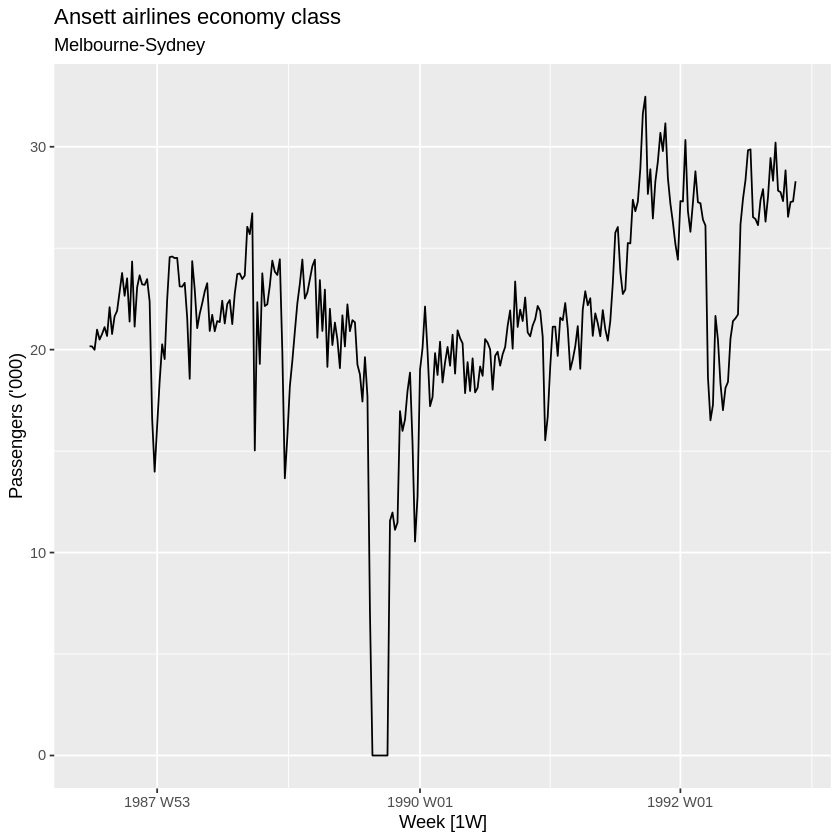

In [15]:
autoplot(melsyd_economy, Passengers) +
labs(title = "Ansett airlines economy class", subtitle = "Melbourne-Sydney", y = "Passengers ('000)")

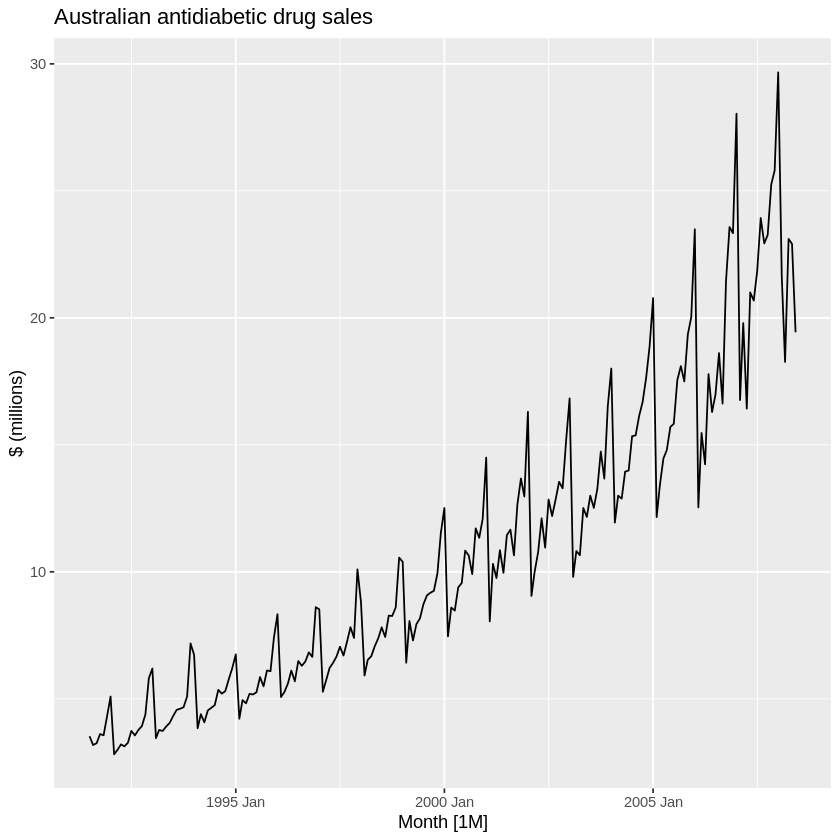

In [4]:
PBS %>% 
filter(ATC2== "A10") %>%
select(Month, Concession, Type, Cost) %>%
summarise(TotalC=sum(Cost)) %>%
mutate(Cost = TotalC/1e6) ->a10

autoplot(a10, Cost) + labs( y="$ (millions)", title="Australian antidiabetic drug sales")

In [6]:
a10

Month,TotalC,Cost
1991 Jul,3526591,3.526591
1991 Aug,3180891,3.180891
1991 Sep,3252221,3.252221
1991 Oct,3611003,3.611003
1991 Nov,3565869,3.565869
1991 Dec,4306371,4.306371
1992 Jan,5088335,5.088335
1992 Feb,2814520,2.814520
1992 Mar,2985811,2.985811
1992 Apr,3204780,3.204780


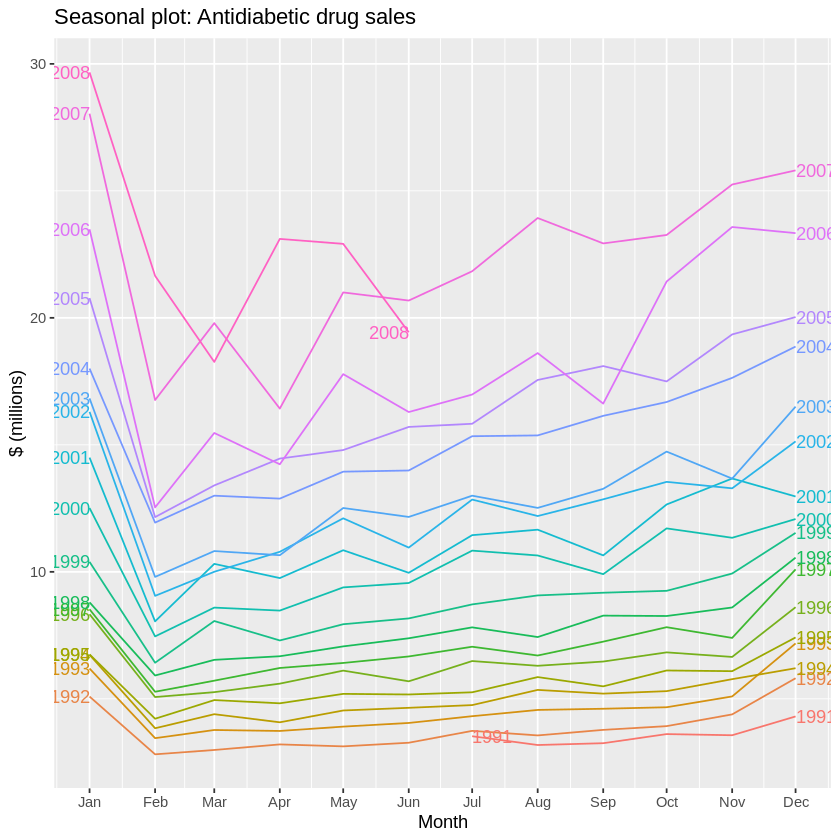

In [8]:
a10 %>%
  gg_season(Cost, labels = "both") +
  labs(y = "$ (millions)",
       title = "Seasonal plot: Antidiabetic drug sales")

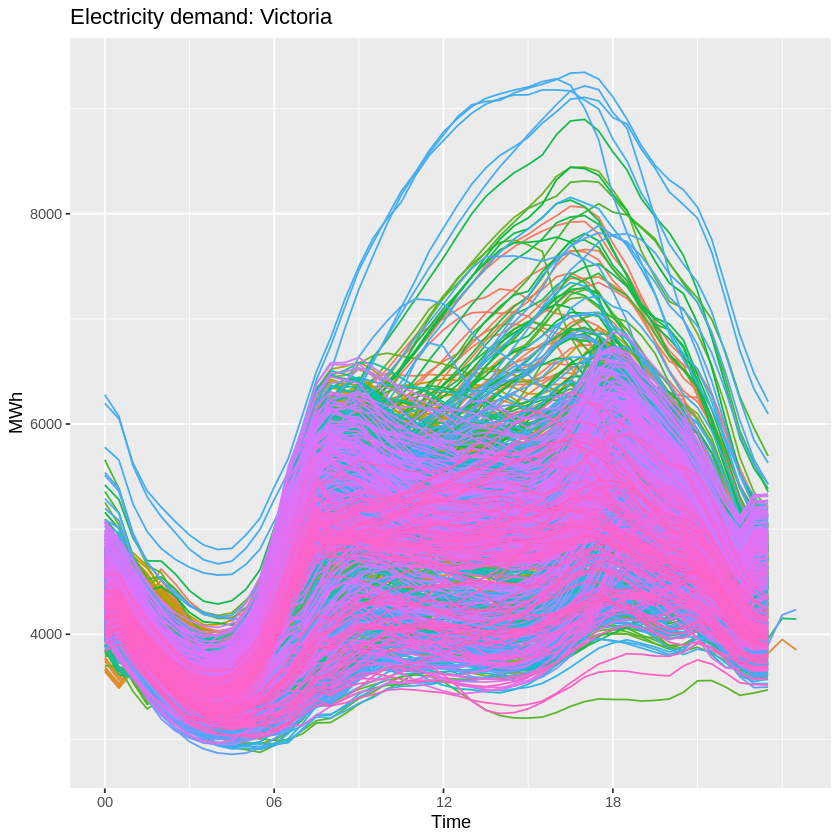

In [15]:
vic_elec %>% gg_season(Demand, period = "day") +
  theme(legend.position = "none") +
  labs(y="MWh", title="Electricity demand: Victoria")

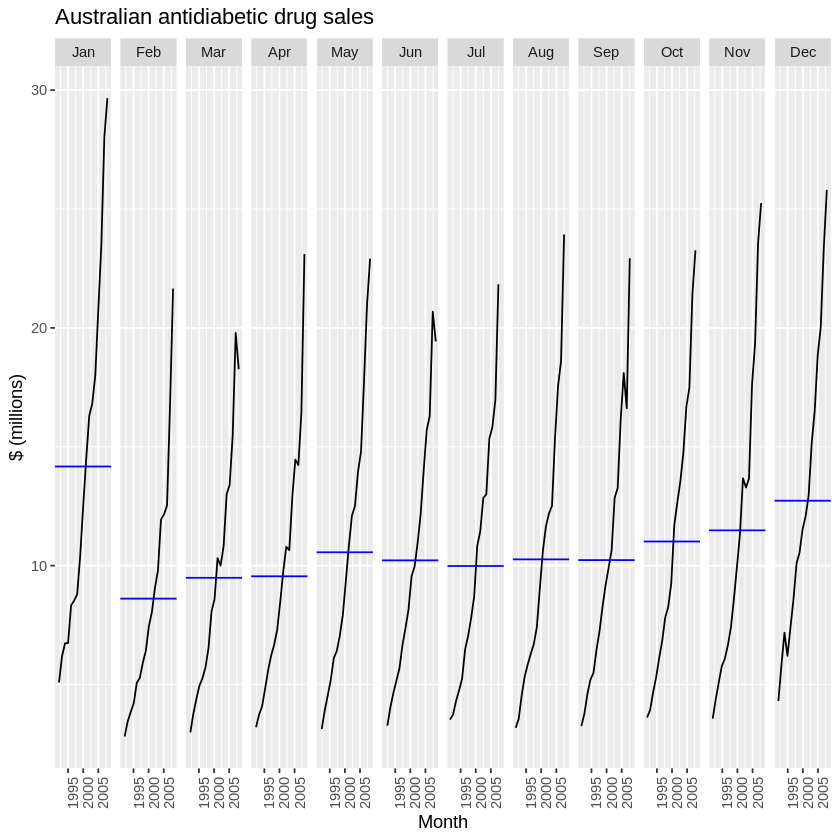

In [20]:
a10 %>%
  gg_subseries(Cost) +
  labs(
    y = "$ (millions)",
    title = "Australian antidiabetic drug sales", 
    height=110
  )

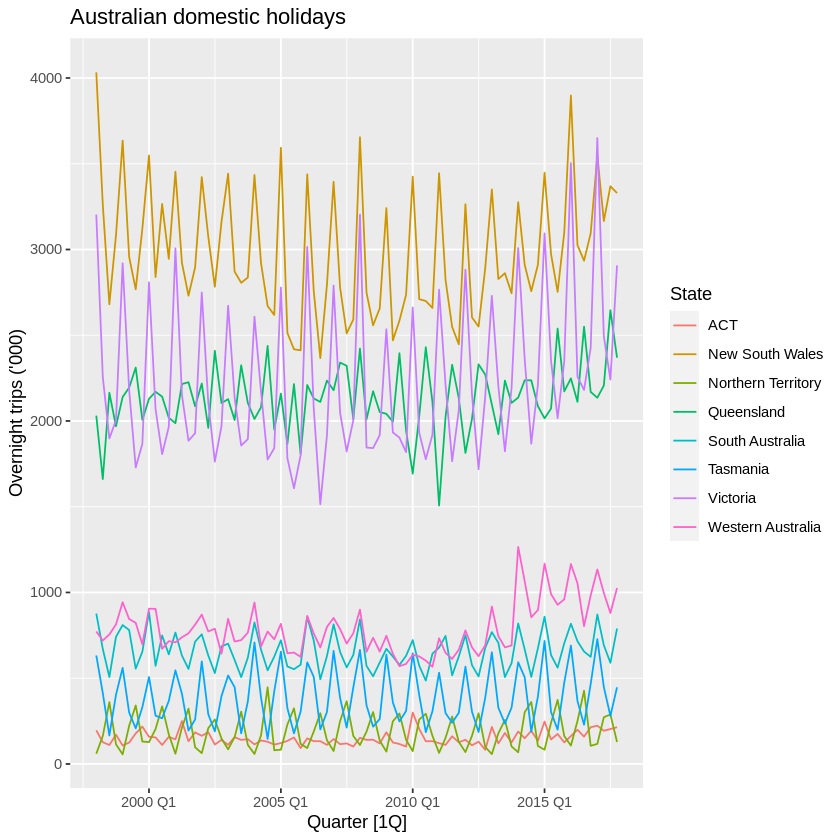

In [21]:
holidays <- tourism %>%
  filter(Purpose == "Holiday") %>%
  group_by(State) %>%
  summarise(Trips = sum(Trips))

autoplot(holidays, Trips) +
  labs(y = "Overnight trips ('000)",
       title = "Australian domestic holidays")

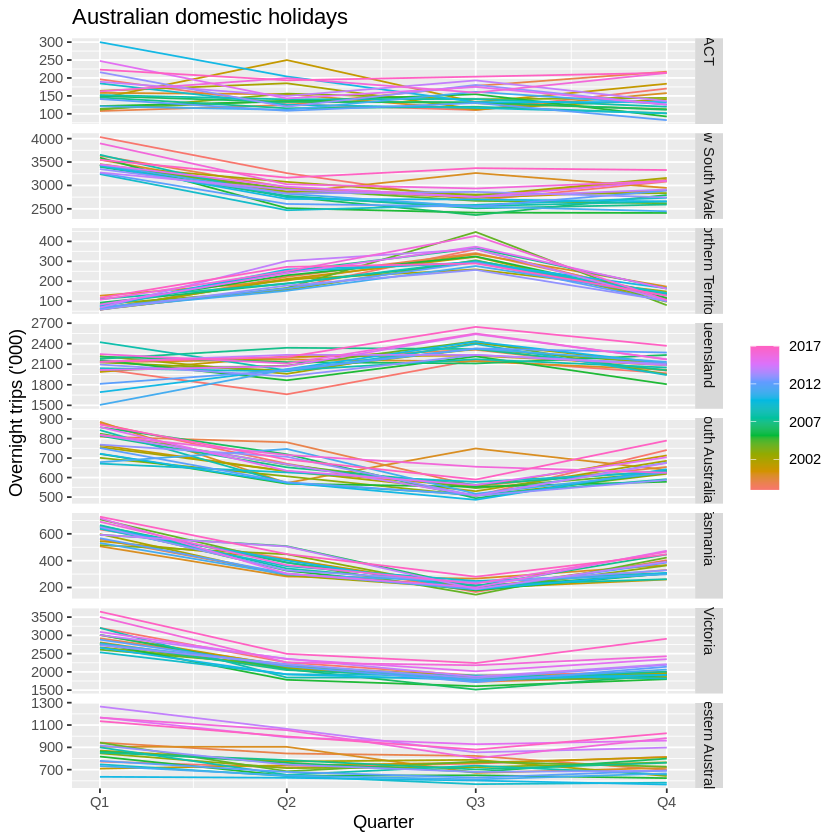

In [22]:
gg_season(holidays, Trips) +
  labs(y = "Overnight trips ('000)",
       title = "Australian domestic holidays")

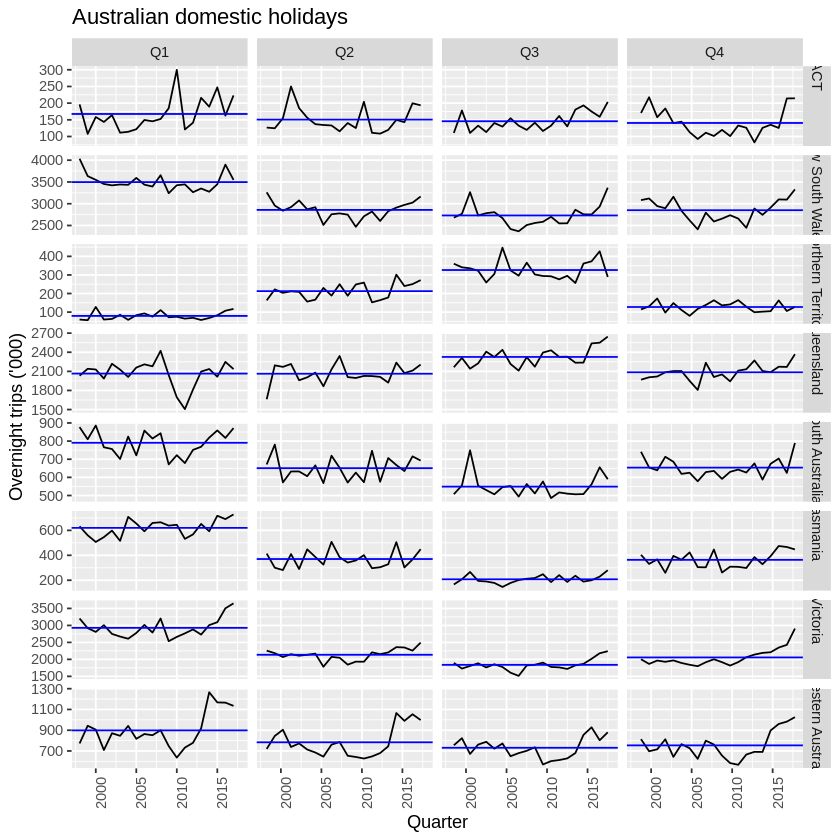

In [23]:
holidays %>%
  gg_subseries(Trips) +
  labs(y = "Overnight trips ('000)",
       title = "Australian domestic holidays")